In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [3]:
from tensorflow.keras.utils import to_categorical  # one-hot encoding

t_train_one_hot = to_categorical(t_train, 10)

t_test_one_hot = to_categorical(t_test, 10)

In [4]:
model_one_hot = Sequential()

model_one_hot.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

model_one_hot.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model_one_hot.add(Flatten())

model_one_hot.add(Dense(10, activation='softmax'))

In [5]:
model_one_hot.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_one_hot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist_one_hot = model_one_hot.fit(x_train.reshape(-1,28,28,1), t_train_one_hot,
                 batch_size=50, epochs=30, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 11s 8ms/step - loss: 0.2931 - accuracy: 0.9180 - val_loss: 0.1305 - val_accuracy: 0.9644
Epoch 2/30
960/960 [==============================] - 5s 5ms/step - loss: 0.1077 - accuracy: 0.9697 - val_loss: 0.0947 - val_accuracy: 0.9744
Epoch 3/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0769 - accuracy: 0.9780 - val_loss: 0.0805 - val_accuracy: 0.9777
Epoch 4/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0726 - val_accuracy: 0.9793
Epoch 5/30
960/960 [==============================] - 5s 6ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0636 - val_accuracy: 0.9809
Epoch 6/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 7/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0675 - val_accuracy: 0.9803
Epoch

In [7]:
model_one_hot.evaluate(x_test.reshape(-1,28,28,1), t_test_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 0.0973 - accuracy: 0.9793


[0.09731550514698029, 0.9793000221252441]

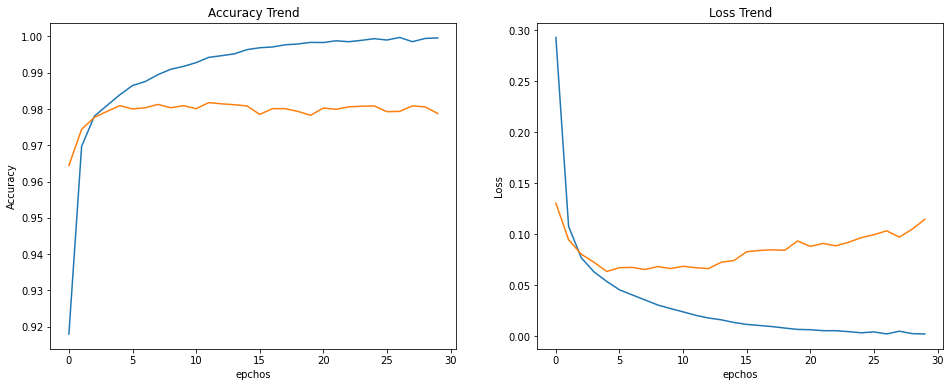

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(hist_one_hot.history['accuracy'])
plt.plot(hist_one_hot.history['val_accuracy'])
plt.xlabel('epchos')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.subplot(122)
plt.plot(hist_one_hot.history['loss'])
plt.plot(hist_one_hot.history['val_loss'])
plt.xlabel('epchos')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.show()

Sparse 방식

In [9]:
model_sparse = Sequential()

model_sparse.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

model_sparse.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model_sparse.add(Flatten())

model_sparse.add(Dense(10, activation='softmax'))

In [10]:
model_sparse.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_sparse.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist_sparse = model_sparse.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=30, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 6s 5ms/step - loss: 0.2832 - accuracy: 0.9196 - val_loss: 0.1217 - val_accuracy: 0.9682
Epoch 2/30
960/960 [==============================] - 5s 5ms/step - loss: 0.1010 - accuracy: 0.9716 - val_loss: 0.0888 - val_accuracy: 0.9749
Epoch 3/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0716 - accuracy: 0.9797 - val_loss: 0.0757 - val_accuracy: 0.9777
Epoch 4/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0582 - accuracy: 0.9830 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 5/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0636 - val_accuracy: 0.9821
Epoch 6/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0424 - accuracy: 0.9878 - val_loss: 0.0713 - val_accuracy: 0.9793
Epoch 7/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 

In [12]:
model_sparse.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0869 - accuracy: 0.9823


[0.08693553507328033, 0.9822999835014343]

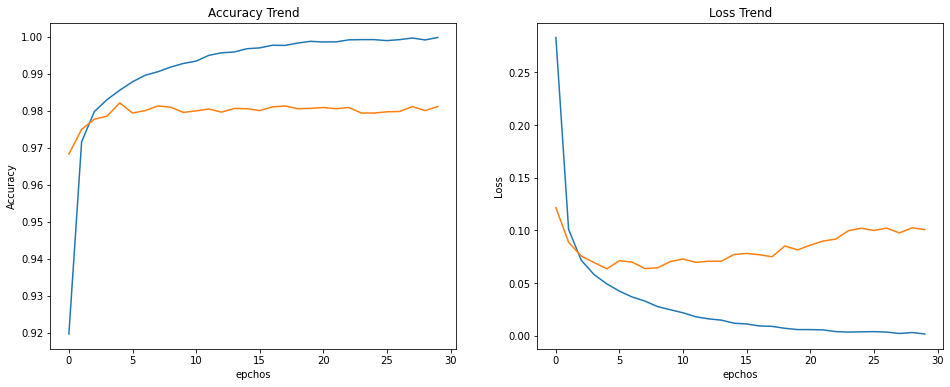

In [13]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(hist_sparse.history['accuracy'])
plt.plot(hist_sparse.history['val_accuracy'])
plt.xlabel('epchos')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.subplot(122)
plt.plot(hist_sparse.history['loss'])
plt.plot(hist_sparse.history['val_loss'])
plt.xlabel('epchos')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.show()

one hot encoding 방식과 sparse 방식에서 임의의 테스트 데이터를 1개 선택 후 비교

In [14]:
idx = np.random.randint(len(x_test))
print(idx)
x_sample = x_test[idx].reshape(-1,28,28,1)

predict_one_hot = model_one_hot.predict(x_sample)
predict_val = model_sparse.predict(x_sample)
print(predict_val)
print(np.argmax(predict_val))
print('')
print(predict_one_hot)
print(np.argmax(predict_one_hot))

4110
[[6.92966506e-15 9.99989986e-01 8.37960867e-10 2.26496200e-11
  5.06406104e-06 1.02277170e-14 2.63867893e-13 4.99022190e-06
  7.00331215e-09 1.31494616e-11]]
1

[[6.0158889e-14 9.9998140e-01 2.1586361e-11 3.2578382e-10 2.1763274e-06
  1.5411290e-14 2.4984677e-13 1.6362463e-05 2.8864733e-09 6.0225882e-12]]
1
